In [132]:
#importación de librerías

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [133]:
# abrir csv

df1 = pd.read_csv("files/Customer Flight Activity.csv", index_col = 0)
df1.head()


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [134]:
df1.tail()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
999902,2018,12,0,0,0,0,0.0,0,0
999911,2018,12,0,0,0,0,0.0,0,0
999940,2018,12,3,0,3,1233,123.0,0,0
999982,2018,12,0,0,0,0,0.0,0,0
999986,2018,12,0,0,0,0,0.0,0,0


In [135]:
df1.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [136]:
#número de filas
df1.shape[0]

405624

In [137]:
columnas1 = df1.select_dtypes(include =["int", "float"]).columns
columnas1

#confirmar que todas las columnas son numéricas

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [138]:
df1.info()

# "Points Accumulated" a lo mejor convertir en int; Year Month, a lo mejor convertir en fecha

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [139]:
df1["Points Accumulated"]

#si lo veo necesario, este puede convertirse a int

Loyalty Number
100018    152.0
100102    203.0
100140    120.0
100214      0.0
100272      0.0
          ...  
999902      0.0
999911      0.0
999940    123.0
999982      0.0
999986      0.0
Name: Points Accumulated, Length: 405624, dtype: float64

In [140]:
# cambiar nombre de las columnas quitando espacio, porque si no, no puedo utilizar .loc
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns

Index(['Year', 'Month', 'Flights_Booked', 'Flights_with_Companions',
       'Total_Flights', 'Distance', 'Points_Accumulated', 'Points_Redeemed',
       'Dollar_Cost_Points_Redeemed'],
      dtype='object')

In [141]:
df1.isnull().sum()

# buscando valores nulos


Year                           0
Month                          0
Flights_Booked                 0
Flights_with_Companions        0
Total_Flights                  0
Distance                       0
Points_Accumulated             0
Points_Redeemed                0
Dollar_Cost_Points_Redeemed    0
dtype: int64

In [142]:
df1["Flights_Booked"].isnull()

df1["Points_Accumulated"].isnull()

#comprobando en un par de columnas que no hay nulos

Loyalty Number
100018    False
100102    False
100140    False
100214    False
100272    False
          ...  
999902    False
999911    False
999940    False
999982    False
999986    False
Name: Points_Accumulated, Length: 405624, dtype: bool

In [143]:
#comprobando número de nulos
df1.duplicated().sum()

228705

In [144]:
df1[df1.duplicated()].sample(10)

,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty Number,,,,,,,,,
139479,2018,11,0,0,0,0,0.0,0,0
710053,2017,9,0,0,0,0,0.0,0,0
288774,2017,2,0,0,0,0,0.0,0,0
921102,2017,12,0,0,0,0,0.0,0,0
548752,2017,2,0,0,0,0,0.0,0,0
258248,2018,8,0,0,0,0,0.0,0,0
926451,2018,11,0,0,0,0,0.0,0,0
270183,2018,6,0,0,0,0,0.0,0,0
616342,2018,11,9,0,9,594,59.0,0,0


In [145]:
#revisando los duplicados 
df1.index.value_counts()

678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64

In [146]:
#eliminar los duplicados
df1 = df1.drop_duplicates()

In [147]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176919 entries, 100018 to 999940
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         176919 non-null  int64  
 1   Month                        176919 non-null  int64  
 2   Flights_Booked               176919 non-null  int64  
 3   Flights_with_Companions      176919 non-null  int64  
 4   Total_Flights                176919 non-null  int64  
 5   Distance                     176919 non-null  int64  
 6   Points_Accumulated           176919 non-null  float64
 7   Points_Redeemed              176919 non-null  int64  
 8   Dollar_Cost_Points_Redeemed  176919 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 13.5 MB


In [148]:

df2 = pd.read_csv("files/Customer Loyalty History.csv", index_col = 0)
df2.head()

#abrir segundo csv

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [149]:
#explorar segundo csv
df2.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [150]:
df2.shape[0]

16737

In [151]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage

In [152]:
# cambiar nombre de las columnas quitando espacio, porque si no, no puedo utilizar .loc
df2.columns = df2.columns.str.replace(" ", "_")
df2.columns

Index(['Country', 'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Salary', 'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month', 'Cancellation_Year',
       'Cancellation_Month'],
      dtype='object')

In [153]:
df2["CLV"].sample(4)

Loyalty Number
287212     5123.48
236003     2719.85
863219    22952.07
297167     8406.39
Name: CLV, dtype: float64

In [154]:
df2["CLV"].unique()
df2["CLV"].value_counts()


#tratando de entender qué significa CLV; Customer Lifetime Value; si lo necesito posteriormente hay modos distintos de calcularlo

8564.77     13
13024.13    12
3808.12     12
2359.42     12
3731.50     12
            ..
16152.90     1
5204.65      1
5620.59      1
5205.02      1
61134.68     1
Name: CLV, Length: 7984, dtype: int64

In [155]:
df2["CLV"].describe()

count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: CLV, dtype: float64

In [156]:
#convertir las Enrollement Year y Month  en float para unificar
df2["Enrollment_Year"].astype("int64", errors = "ignore")
df2["Enrollment_Month"].astype("int64", errors = "ignore")

df2["Enrollment_Year"]
df2["Enrollment_Month"]


Loyalty Number
480934     2
549612     3
429460     7
608370     2
530508    10
          ..
823768    12
680886     9
776187     3
906428     4
652627    12
Name: Enrollment_Month, Length: 16737, dtype: int64

In [157]:
#Cancellation Year y Month también con "Int64", con errors="ignore" porque tiene muchos nulos

df2["Cancellation_Year"] = df2["Cancellation_Year"].astype('Int64', errors="ignore")
df2["Cancellation_Month"] = df2["Cancellation_Month"].astype('Int64', errors="ignore")

In [158]:
#gestión de nulos
df2.isnull().sum()

Country                   0
Province                  0
City                      0
Postal_Code               0
Gender                    0
Education                 0
Salary                 4238
Marital_Status            0
Loyalty_Card              0
CLV                       0
Enrollment_Type           0
Enrollment_Year           0
Enrollment_Month          0
Cancellation_Year     14670
Cancellation_Month    14670
dtype: int64

In [159]:
df2["Salary"]

Loyalty Number
480934     83236.0
549612         NaN
429460         NaN
608370         NaN
530508    103495.0
            ...   
823768         NaN
680886     89210.0
776187         NaN
906428    -57297.0
652627     75049.0
Name: Salary, Length: 16737, dtype: float64

In [160]:
# transformar los números negativos en su valor absoluto
df2["Salary"] = df2["Salary"].abs() 

In [161]:
# análisis de las columnas con nulos, Salary. métricas
df2["Salary"].describe().T
metricas_salary = df2["Salary"].describe().T
metricas_salary

count     12499.000000
mean      79359.340907
std       34749.691464
min        9081.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

In [162]:

#porcentaje de nulos, muy alto 25.32%
df2["Salary"].isnull().sum()/df2.shape[0]*100

25.321144769074504

In [163]:
#!pip install scikit-learn
#!pip install seaborn
#!pip install matplotlib

In [164]:
#pruebas de imputación 

#importar librerías

from sklearn.impute import KNNImputer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import seaborn as sns
import matplotlib.pyplot as plt


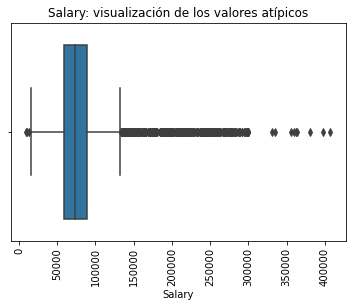

In [165]:
"""buscar valores atípicos, que dada la separación de la 
    media y la mediana, parece probable"""
    
sns.boxplot(data=df2, x="Salary")

# nombramos el eje que queremos que aparezca y rotamos las etiquetas 
plt.xticks(rotation = 90)


plt.title("Salary: visualización de los valores atípicos")
sns.flierprops = dict(marker = "s",markerfacecolor = "red")


plt.show();


Los valores atípicos están concentrados a la derecha, y aunque son muy visibles, la media y cuartiles son bastante homogeneos y bien definidos, creo que lo más sensato sería imputar ese 25% de nulos dentro del rango intercuartílico

In [166]:
df2["Salary"].describe()[["mean", "50%"]] 
#los datos están muy sesgados, será mejor utilizar la mediana


mean    79359.340907
50%     73455.000000
Name: Salary, dtype: float64

In [167]:
# importamos librería
from sklearn.impute import SimpleImputer

In [168]:
# creamos el objeto de la clase del SimpleImputer
imputer_Salary = SimpleImputer(strategy = "median")


Salary_imputado = imputer_Salary.fit_transform(df2[["Salary"]])

# Comprobación
Salary_imputado

array([[83236.],
       [73455.],
       [73455.],
       ...,
       [73455.],
       [57297.],
       [75049.]])

In [169]:
#  sobreescribir la columna original. 
df2["Salary"] = Salary_imputado

# comprobar nulos. 
print(f"Después del 'SimpleImputer' tenemos {df2['Salary'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


In [170]:
#comprobar nuevas estadísticas de "Salary"
df2["Salary"].describe()[["mean", "50%"]] 

mean    77864.294198
50%     73455.000000
Name: Salary, dtype: float64

In [171]:
#revisión "Cancellation_year"
df2["Cancellation_Year"].unique()

<IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64

In [172]:
df2["Cancellation_Year"].isnull().sum()/df2.shape[0]*100

87.65011650833483

In [173]:
"""para limpiar Cancellacion_Year y Cancelation_Month, las dos con un 87% de nulos
y que además no vamos a emplear posteriormente, y así que no merece la pena imputarles valores

Creamos lista con las columnas a cambiar 

iteramos con un for por esas columnas cambiando el tipo a str y reemplazando
los np.nan por "Unknown"

Revisamos """

columns_to_Unknown = ["Cancellation_Year", "Cancellation_Month"]


for columna in columns_to_Unknown:
    
    
    df2[columna] = df2[columna].astype(str).replace(np.nan, "Unknown")
    

print(f"Quedan los siguientes nulos{df2[columns_to_Unknown].isnull().sum()}")


Quedan los siguientes nulosCancellation_Year     0
Cancellation_Month    0
dtype: int64


In [174]:
#revisando si hay duplicados
df2.duplicated().sum()

0

**Unir los dos DataFrame**

In [175]:
""" puesto que se trata de dos dataFrames que tienen información distinta referida a la misma clave
    hay que hacer un merge izquierdo basado en el índice común Loyalty Number. De este modo se conservan todas las filas del más numeroso
    aunque no tengan coincidencia"""

df_final = df1.merge(right=df2, how='left', on= "Loyalty Number")

In [176]:
#comprobaciones
df_final.head()

,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,<NA>,<NA>
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73455.0,Single,Nova,2887.74,Standard,2013,3,<NA>,<NA>
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73455.0,Divorced,Nova,2838.07,Standard,2016,7,<NA>,<NA>
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,<NA>,<NA>
100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,<NA>,<NA>


In [177]:
df_final.columns

Index(['Year', 'Month', 'Flights_Booked', 'Flights_with_Companions',
       'Total_Flights', 'Distance', 'Points_Accumulated', 'Points_Redeemed',
       'Dollar_Cost_Points_Redeemed', 'Country', 'Province', 'City',
       'Postal_Code', 'Gender', 'Education', 'Salary', 'Marital_Status',
       'Loyalty_Card', 'CLV', 'Enrollment_Type', 'Enrollment_Year',
       'Enrollment_Month', 'Cancellation_Year', 'Cancellation_Month'],
      dtype='object')

In [178]:
df_final.size

4246056

In [179]:
#comprobación duplicados
df_final.duplicated().sum()

0

In [180]:
#comprobación nulos
df_final.isnull().sum()

Year                           0
Month                          0
Flights_Booked                 0
Flights_with_Companions        0
Total_Flights                  0
Distance                       0
Points_Accumulated             0
Points_Redeemed                0
Dollar_Cost_Points_Redeemed    0
Country                        0
Province                       0
City                           0
Postal_Code                    0
Gender                         0
Education                      0
Salary                         0
Marital_Status                 0
Loyalty_Card                   0
CLV                            0
Enrollment_Type                0
Enrollment_Year                0
Enrollment_Month               0
Cancellation_Year              0
Cancellation_Month             0
dtype: int64

In [181]:
#guardar el df_final en csv
df_final.to_csv("files/customer_full.csv")

**Visualización**

In [182]:
pd.set_option('display.max_columns', None)

In [183]:
df = pd.read_csv("files/customer_full.csv", index_col = 0)

In [184]:
df.columns

Index(['Year', 'Month', 'Flights_Booked', 'Flights_with_Companions',
       'Total_Flights', 'Distance', 'Points_Accumulated', 'Points_Redeemed',
       'Dollar_Cost_Points_Redeemed', 'Country', 'Province', 'City',
       'Postal_Code', 'Gender', 'Education', 'Salary', 'Marital_Status',
       'Loyalty_Card', 'CLV', 'Enrollment_Type', 'Enrollment_Year',
       'Enrollment_Month', 'Cancellation_Year', 'Cancellation_Month'],
      dtype='object')

In [185]:
df['Month'].value_counts()

12    15804
7     15328
8     15318
6     15263
9     14911
10    14850
3     14837
11    14824
5     14416
2     14189
4     14163
1     13016
Name: Month, dtype: int64

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [201]:

meses = df["Month"].value_counts()
reservas = df["Flights_Booked"].value_counts()

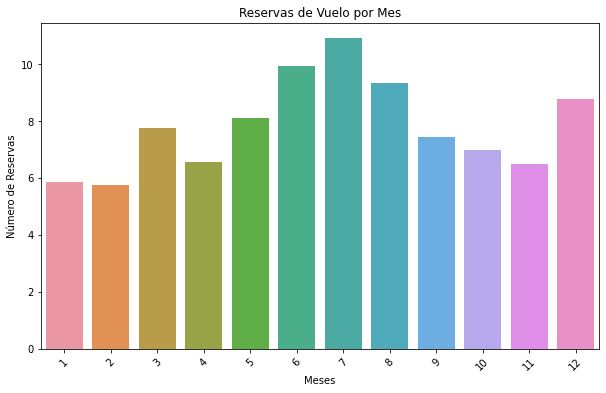

In [206]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="Flights_Booked", data=df, ci=None)  
plt.title('Reservas de Vuelo por Mes')
plt.xlabel('Meses')
plt.ylabel('Número de Reservas')

# Rotar las etiquetas 
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

La visualización permite observar la subida de los meses de verano, con los mayores valores en el mes de julio y una subida puntual el mes de diciembre

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [207]:
df.columns

Index(['Year', 'Month', 'Flights_Booked', 'Flights_with_Companions',
       'Total_Flights', 'Distance', 'Points_Accumulated', 'Points_Redeemed',
       'Dollar_Cost_Points_Redeemed', 'Country', 'Province', 'City',
       'Postal_Code', 'Gender', 'Education', 'Salary', 'Marital_Status',
       'Loyalty_Card', 'CLV', 'Enrollment_Type', 'Enrollment_Year',
       'Enrollment_Month', 'Cancellation_Year', 'Cancellation_Month'],
      dtype='object')

In [209]:
#importar libreria
from itertools import combinations

In [214]:
"""creo una variable para comprobar el coeficiente de correlación entre la distancia y 
los puntos acumulados. Pearson sirve para relaciones lineales entre variables. El coeficiente de 
correlación es 0.982014, cercano a 1, lo que indica una correlación positiva fuerte. A más kilómetros,
más puntos"""

df_correlacion_distancia_puntos = df[['Distance', 'Points_Accumulated']].corr(method = "pearson")
df_correlacion_distancia_puntos

,Distance,Points_Accumulated
Distance,1.000000,0.982014
Points_Accumulated,0.982014,1.000000


3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [218]:
clientes_por_provincia = df["Province"].value_counts()

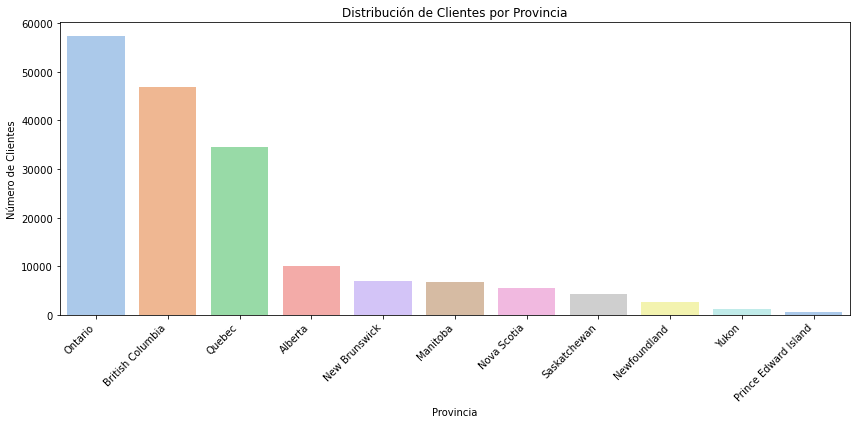

In [222]:

plt.figure(figsize=(12, 6))
sns.barplot(x=clientes_por_provincia.index, y=clientes_por_provincia.values, palette="pastel")
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan las etiquetas
plt.show()


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?